In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../lib')
from ataitmeep import *

import math
import meep as mp
from meep import mpb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
num_bands = 8
k_points = [mp.Vector3(),          # Gamma
            mp.Vector3(0.5),       # X
            mp.Vector3(0.5, 0.5),  # M
            mp.Vector3()]          # Gamma
k_points = mp.interpolate(4, k_points)

In [21]:
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))] # height is infinite
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1))
resolution = 32

In [22]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

In [23]:
# Run it
# ms.run_te()
ms.run_tm(mpb.fix_efield_phase)
# ms.run_te(mpb.output_at_kpoint(mp.Vector3(0.5), mpb.output_hfield_z, mpb.output_dpwr))

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
  Vector3<0.5, 0.1, 0.0>
  Vector3<0.5, 0.2, 0.0>
  Vector3<0.5, 0.30000000000000004, 0.0>
  Vector3<0.5, 0.4, 0.0>
  Vector3<0.5, 0.5, 0.0>
  Vector3<0.4, 0.4, 0.0>
  Vector3<0.3, 0.3, 0.0>
  Vector3<0.19999999999999996, 0.19999999999999996, 0.0>
  Vector3<0.09999999999999998, 0.09999999999999998, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.007091999053955078
elapsed time for k point: 0.052371978759765625
elapsed time for k point: 0.05862593650817871
elapsed time for k point: 0.022443056106567383
elapsed time for k point: 0.020489931106567383
elapsed time for k point: 0.02167510986328125
elapsed time for k point: 0.02355813980102539
elapsed time for k point: 0.021829843521118164
elapsed time for k point: 0.022549152374267

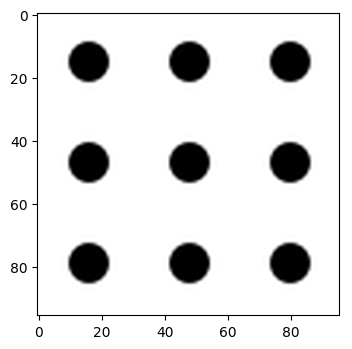

In [24]:
# Visualize index structure
converted_eps = show_geometry(ms)

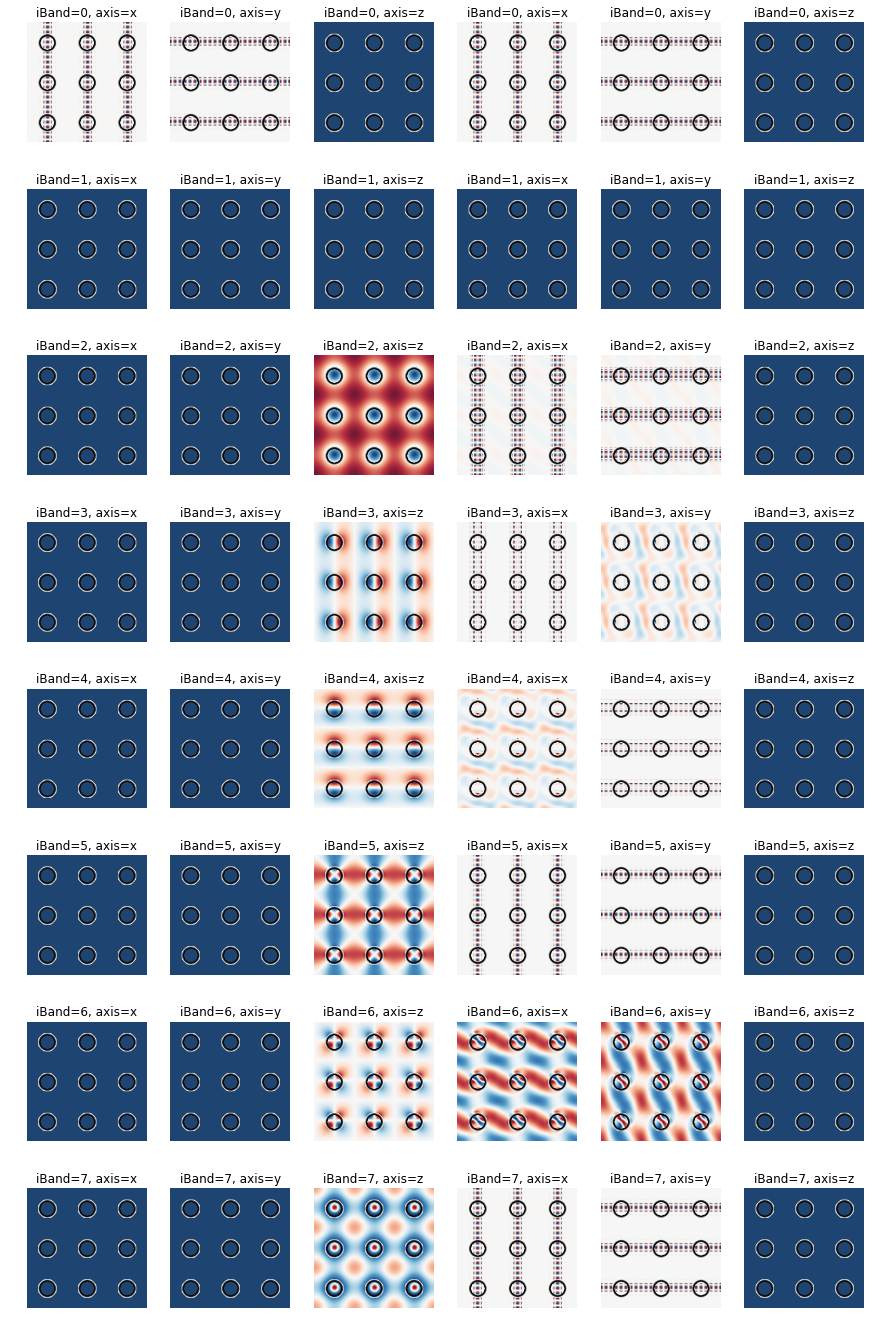

In [33]:
# ef = ms.get_efield(which_band=2)
# plt.imshow(np.real(ef)[:,:,0,2], cmap='seismic')
# ef
md = mpb.MPBData(rectify=True, periods=3, resolution=32)
# eps = ms.get_hfield(which_band=2)
# eps_data = md.convert(eps)  # make aspect ratios right

fi, ax = plt.subplots(nrows=num_bands, ncols=3*2, figsize=(15,3*num_bands))
for iBand in range(num_bands):
    axRow = ax[iBand]
    for iDim in range(6):
        plt.sca(axRow[iDim])
        if iDim < 3:
            eps = ms.get_efield(which_band=iBand, bloch_phase=False)
        else:
            eps = ms.get_hfield(which_band=iBand, bloch_phase=False)
        eps_data = md.convert(eps)
        scalar_data = np.real(eps_data[:, :, iDim % 3])
        
        plt.contour(converted_eps.T, cmap='binary', linewidths=1)
        plt.imshow(scalar_data.transpose()[::-1], interpolation='spline36', cmap='RdBu_r', alpha=0.9)
        plt.axis('off')
        plt.title('iBand={}, axis={}'.format(iBand, ['x', 'y', 'z'][iDim%3]))